### Table des matières
* [Partie1: Structure des données](#p1)
  * [1.Les librairies](#lib)
  * [2.Fichiers des datasets](#files)
       * [2.1.Dataset1 : EdStatsCountry-Series.csv](#d1)
       * [2.2.Dataset2 : EdStatsCountry.csv](#d2)
       * [2.3.Dataset3 : EdStatsData.csv](#d3)
       * [2.4.Dataset4 : EdStatsFootNote.csv](#d4)
       * [2.5.Dataset5 : EdStatsSeries.csv](#d5)
* [Parti2: Etude des indicateurs](#p2)
  * [1.Enlever les petits pays](#sc)
  * [2.Choix des indicateurs](#ci)
  * [3.Boites à moustache](#bp) 
  * [4.Ordre de grandeur des indicateurs](#og)
  * [5.Ordre de grandeur des indicateurs par pays](#ogc)
  * [6.Graphiques: Cartes](#fol)

# Partie1: Structure des données <a class="anchor" id="p1"></a>
## 1.Les librairies<a class="anchor" id="lib"></a>

In [2]:

#import sys
#!{sys.executable} -m pip install missingno

In [3]:
#!pip install geopy

In [4]:
#!pip install requests

In [5]:
#!pip install folium

In [6]:
#importing required packages
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt 
import geopandas as gpd
#import requests 
#import folium 



In [7]:
#loop  to give some paquetages' versions

librairies={'pandas':pd,'numpy':np,'missingno':msno}
for key,values in librairies.items():
    print(key,'\'s version is', values.__version__)


pandas 's version is 1.4.2
numpy 's version is 1.22.3
missingno 's version is 0.5.1


## 2.Fichiers des datasets <a class="anchor" id="Files"></a>

In [8]:
from os import listdir
from os.path import isfile, join
mypath='Projet+Python_Dataset_Edstats_csv'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['EdStatsCountry-Series.csv', 'EdStatsCountry.csv', 'EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsSeries.csv']


### 2.1.Dataset1 : EdStatsCountry-Series.csv <a class="anchor" id="d1"></a>

In [9]:
#Dataset1
f1=mypath+'/'+onlyfiles[0]
print(onlyfiles[0])
df1=pd.read_csv(f1)
print('Rows number:',df1.shape[0], ',Columns number:',df1.shape[1])
df1.columns
print( onlyfiles[0], 'columns\'name are',df1.columns.values)


EdStatsCountry-Series.csv
Rows number: 613 ,Columns number: 4
EdStatsCountry-Series.csv columns'name are ['CountryCode' 'SeriesCode' 'DESCRIPTION' 'Unnamed: 3']


In [10]:
df1.head(3)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [11]:

df1['SeriesCode'].unique().shape
df1.shape

(613, 4)

In [12]:
#duplicated rows
bool_series = df1.duplicated()
print('Number of duplicated rows:',(bool_series).sum())

Number of duplicated rows: 0


In [13]:
#Missing values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [14]:
#Number of missing values in each column
df1.isna().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

### 2.2.Dataset2 : EdStatsCountry.csv <a class="anchor" id="d2"></a>

In [15]:
#Dataset2
f2=mypath+'/'+onlyfiles[1]
print(onlyfiles[1])
df2=pd.read_csv(f2)

print('Rows number:',df2.shape[0], ',Columns number:',df2.shape[1])
df2.columns
print( onlyfiles[1], 'columns\'name are',df2.columns.values)


EdStatsCountry.csv
Rows number: 241 ,Columns number: 32
EdStatsCountry.csv columns'name are ['Country Code' 'Short Name' 'Table Name' 'Long Name' '2-alpha code'
 'Currency Unit' 'Special Notes' 'Region' 'Income Group' 'WB-2 code'
 'National accounts base year' 'National accounts reference year'
 'SNA price valuation' 'Lending category' 'Other groups'
 'System of National Accounts' 'Alternative conversion factor'
 'PPP survey year' 'Balance of Payments Manual in use'
 'External debt Reporting status' 'System of trade'
 'Government Accounting concept' 'IMF data dissemination standard'
 'Latest population census' 'Latest household survey'
 'Source of most recent Income and expenditure data'
 'Vital registration complete' 'Latest agricultural census'
 'Latest industrial data' 'Latest trade data'
 'Latest water withdrawal data' 'Unnamed: 31']


In [16]:
df2.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


In [17]:
#duplicated rows
bool_series2 = df2.duplicated()
print('Number of duplicated rows:',(bool_series2).sum())

Number of duplicated rows: 0


In [18]:
#Missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [19]:
#Number of missing values in each column
df2.isna().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

<AxesSubplot:>

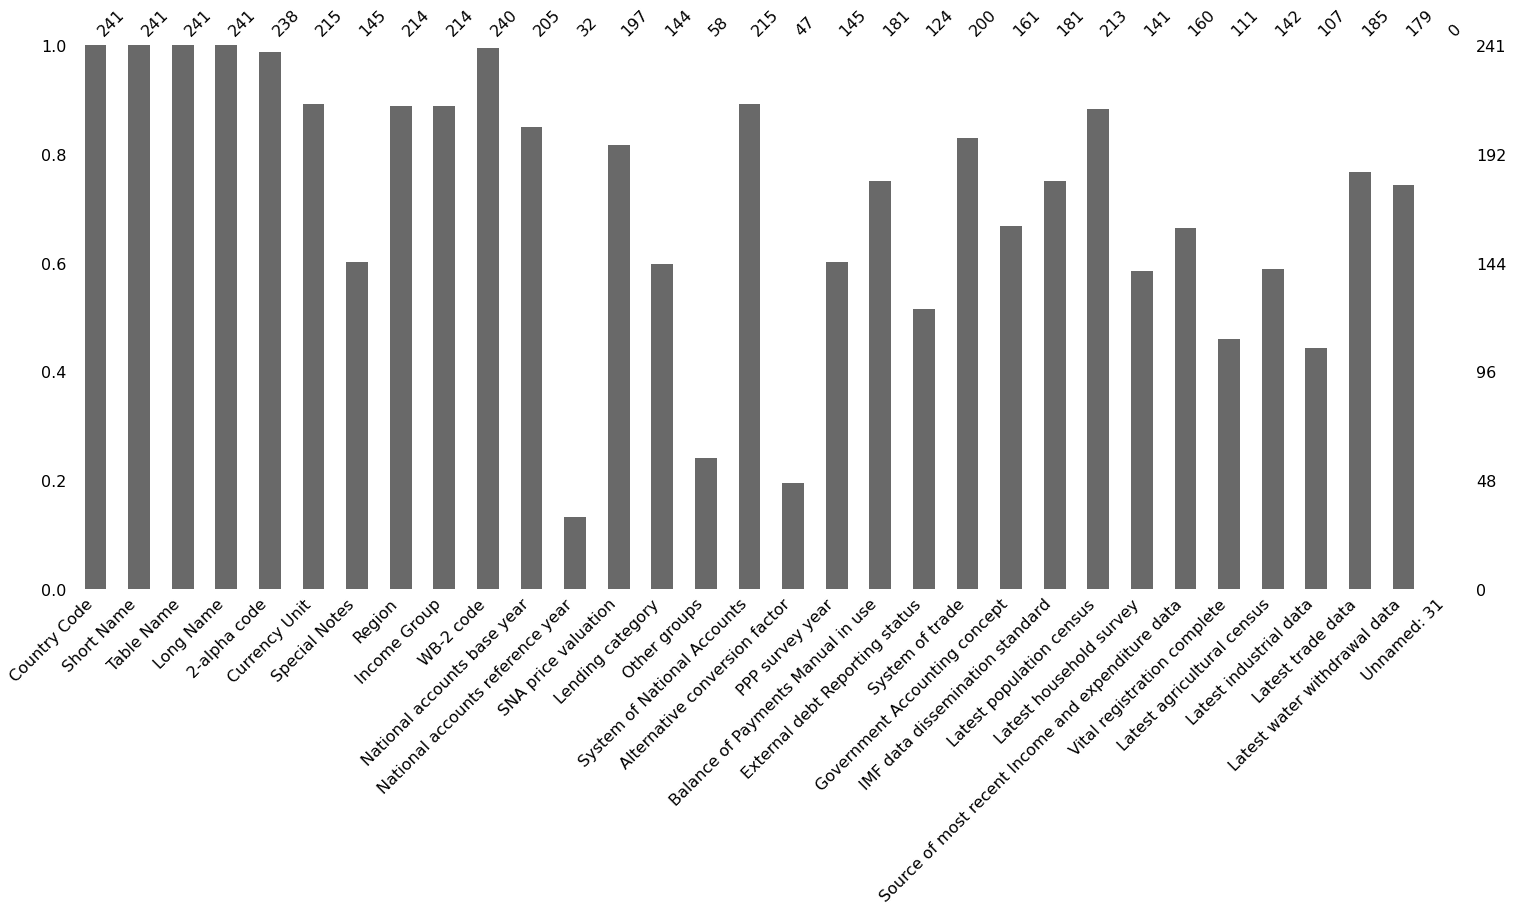

In [20]:
# Gives a bar chart of the missing values
msno.bar(df2)

<AxesSubplot:>

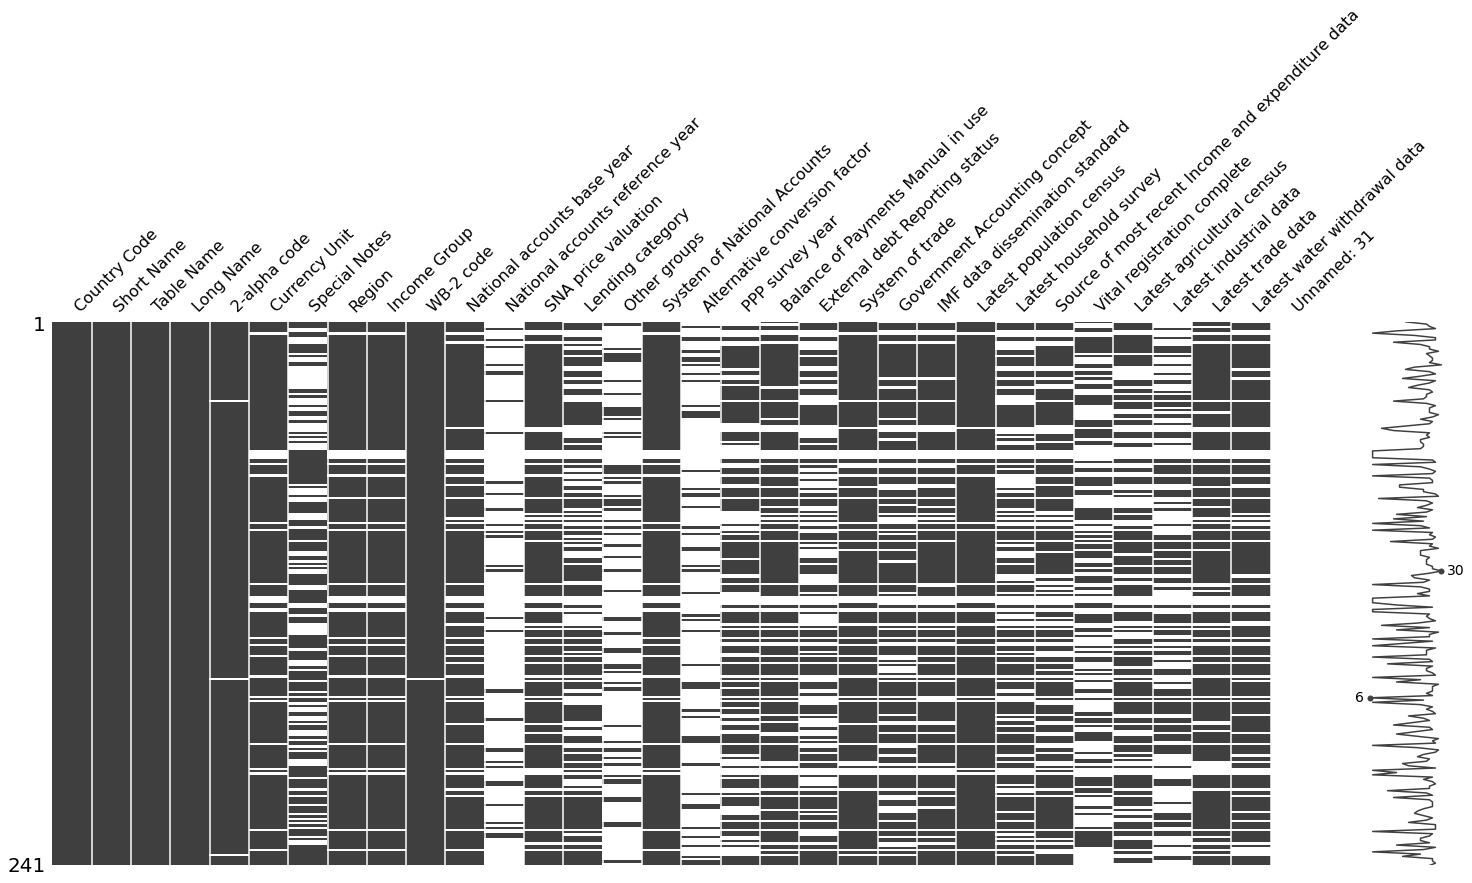

In [21]:
# Gives positional information of the missing values
msno.matrix(df2)

### 2.3.Dataset3 : EdStatsData.csv <a class="anchor" id="d3"></a>

In [22]:
#Dataset3
f3=mypath+'/'+onlyfiles[2]
print(onlyfiles[2])
df3=pd.read_csv(f3)
print('Rows number:',df3.shape[0], ',Columns number:',df3.shape[1])
df3.columns
print( onlyfiles[2], 'columns\'name are',df3.columns.values)

EdStatsData.csv
Rows number: 886930 ,Columns number: 70
EdStatsData.csv columns'name are ['Country Name' 'Country Code' 'Indicator Name' 'Indicator Code' '1970'
 '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980'
 '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990'
 '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2020' '2025' '2030'
 '2035' '2040' '2045' '2050' '2055' '2060' '2065' '2070' '2075' '2080'
 '2085' '2090' '2095' '2100' 'Unnamed: 69']


In [23]:
df3.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df3['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [25]:
#duplicated rows
bool_series3 = df3.duplicated()
print('Number of duplicated rows:',(bool_series3).sum())

Number of duplicated rows: 0


In [26]:
#Missing values
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [27]:
df3.isna().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

<AxesSubplot:>

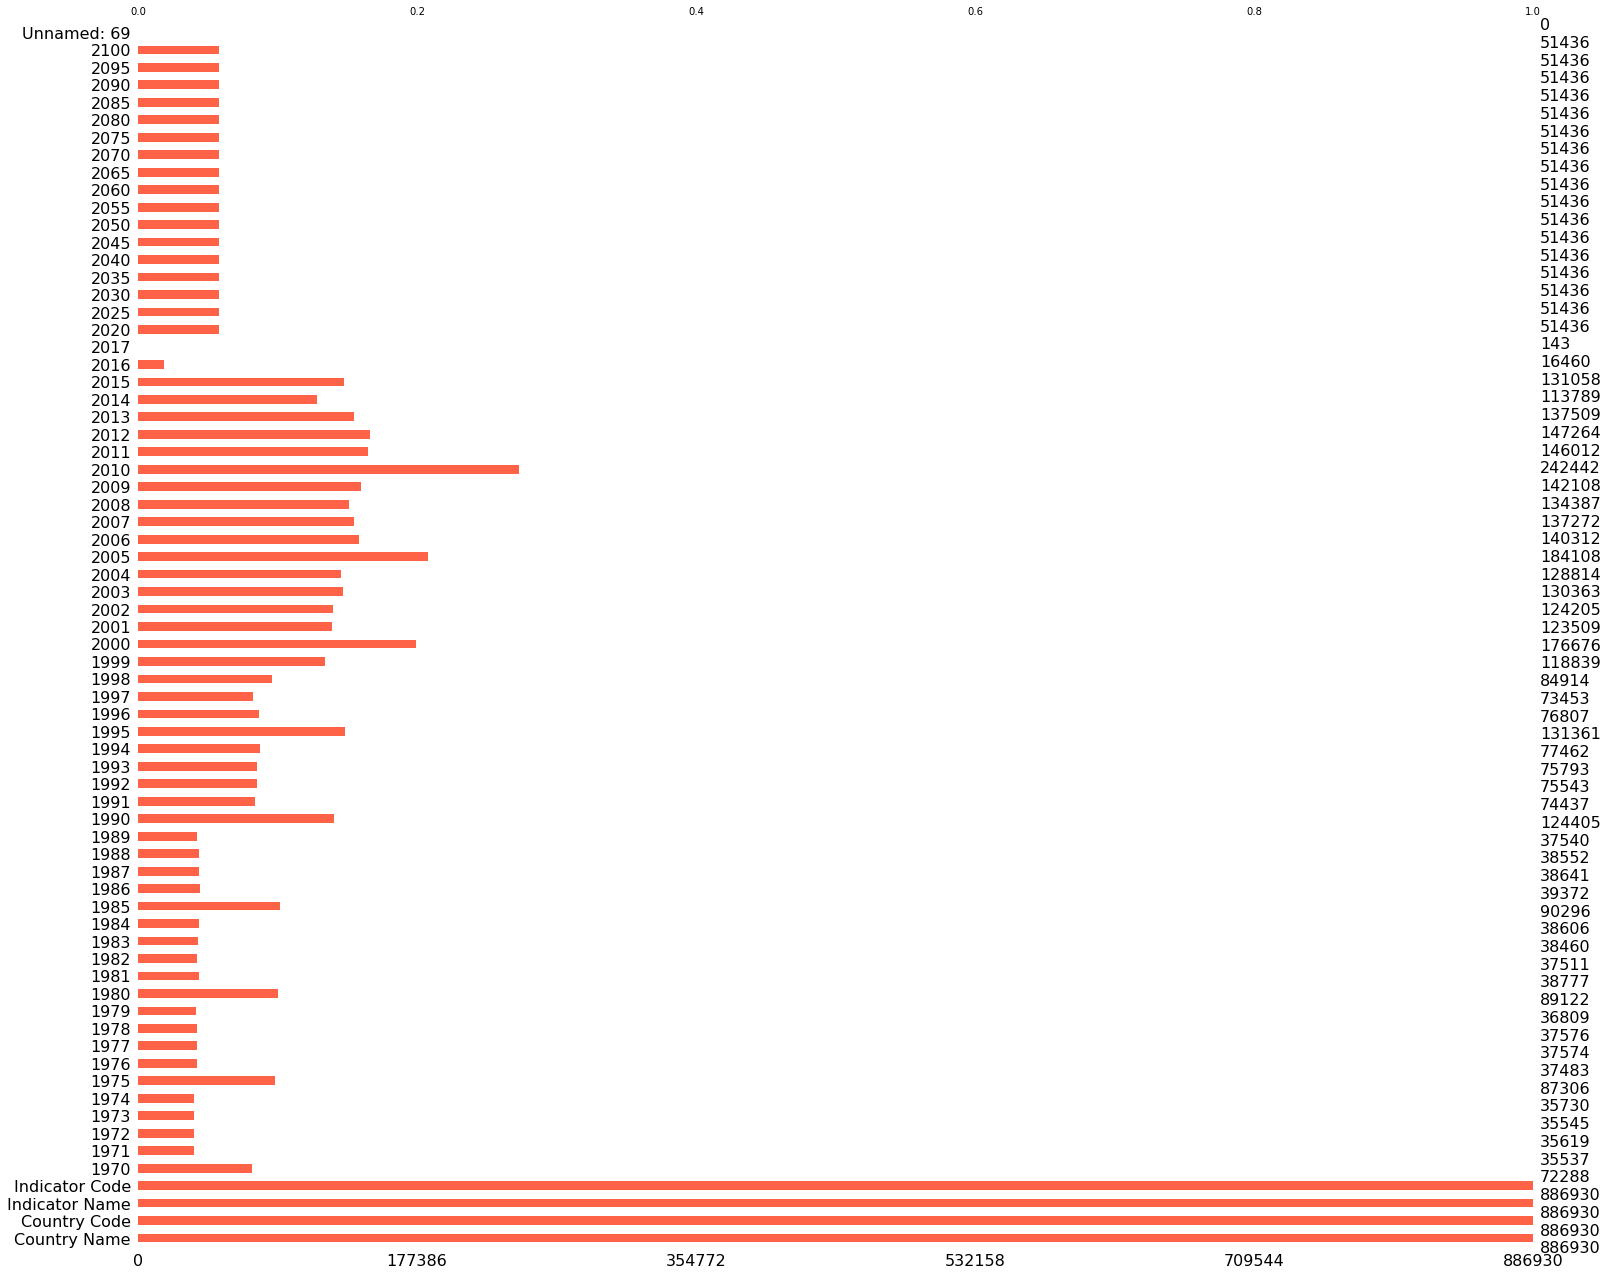

In [31]:
# Gives a bar chart of the missing values
#fig = plt.figure(figsize=(15,7))
msno.bar(df3,color="tomato")
#plt.savefig('miss.png',dpi=400)

### 2.4. Dataset4 : EdStatsFootNote.csv <a class="anchor" id="d4"></a>

In [39]:
#Dataset4
f4=mypath+'/'+onlyfiles[3]
print(onlyfiles[3])
df4=pd.read_csv(f4)

print('Rows number:',df4.shape[0], ',Columns number:',df4.shape[1])
df4.columns
print( onlyfiles[3], 'columns\'name are',df4.columns.values)

EdStatsFootNote.csv
Rows number: 643638 ,Columns number: 5
EdStatsFootNote.csv columns'name are ['CountryCode' 'SeriesCode' 'Year' 'DESCRIPTION' 'Unnamed: 4']


In [40]:
df4.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


In [41]:
#duplicated rows
bool_series4 = df4.duplicated()
print('Number of duplicated rows:',(bool_series4).sum())

Number of duplicated rows: 0


In [42]:
#Missing values
#information about the dataset
df4.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [43]:
#Number of missing values in each column
df4.isna().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

<AxesSubplot:>

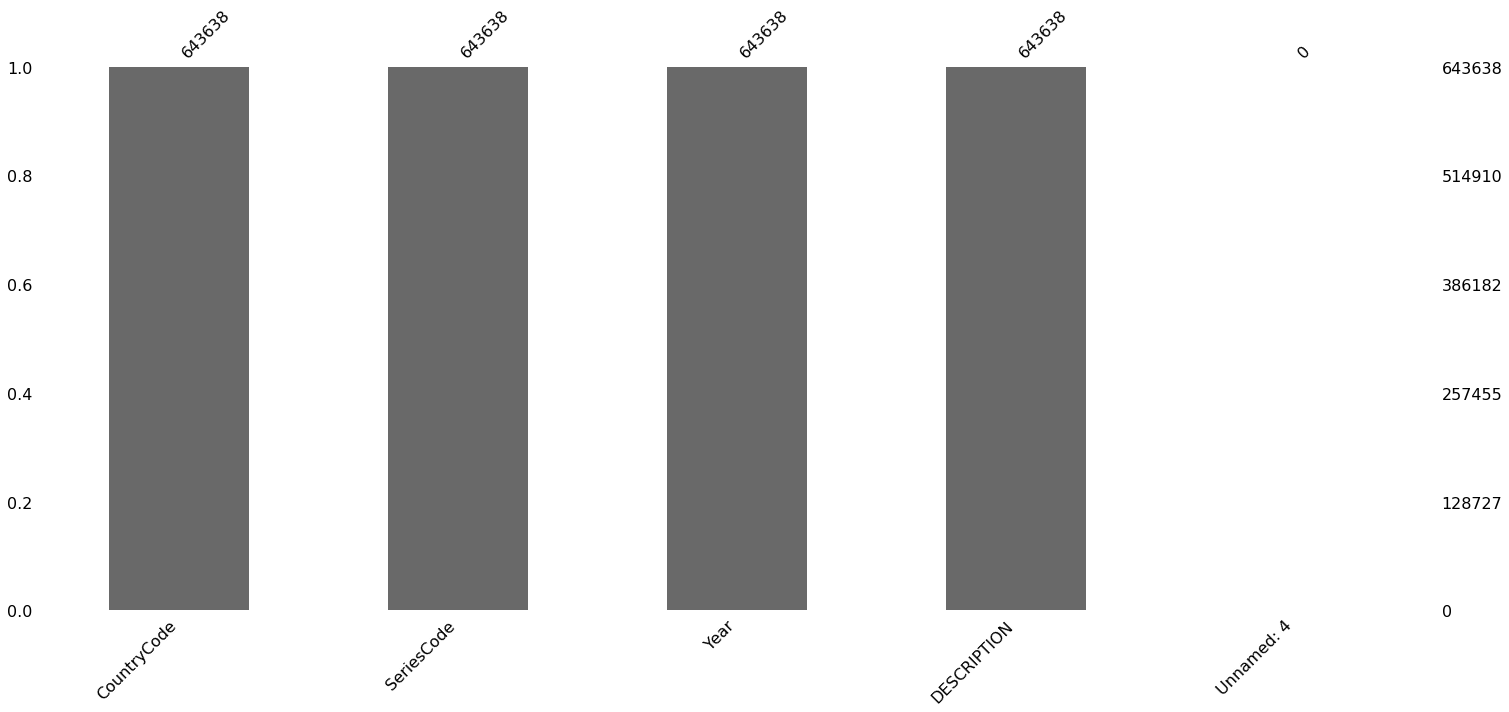

In [44]:
# Gives a bar chart of the missing values
msno.bar(df4)

### 2.5.Dataset5 : EdStatsSeries.csv <a class="anchor" id="d5"></a>

In [45]:
#Dataset5
f5=mypath+'/'+onlyfiles[4]
print(onlyfiles[4])
df5=pd.read_csv(f5)

print('Rows number:',df5.shape[0], ',Columns number:',df5.shape[1])
df5.columns
print( onlyfiles[4], 'columns\'name are',df5.columns.values)

EdStatsSeries.csv
Rows number: 3665 ,Columns number: 21
EdStatsSeries.csv columns'name are ['Series Code' 'Topic' 'Indicator Name' 'Short definition'
 'Long definition' 'Unit of measure' 'Periodicity' 'Base Period'
 'Other notes' 'Aggregation method' 'Limitations and exceptions'
 'Notes from original source' 'General comments' 'Source'
 'Statistical concept and methodology' 'Development relevance'
 'Related source links' 'Other web links' 'Related indicators'
 'License Type' 'Unnamed: 20']


In [46]:
df5.head(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#duplicated rows
bool_series5 = df5.duplicated()
print('Number of duplicated rows:',(bool_series5).sum())

Number of duplicated rows: 0


In [48]:
#Missing values
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [49]:
#Number of missing values in each column
df5.isna().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

<AxesSubplot:>

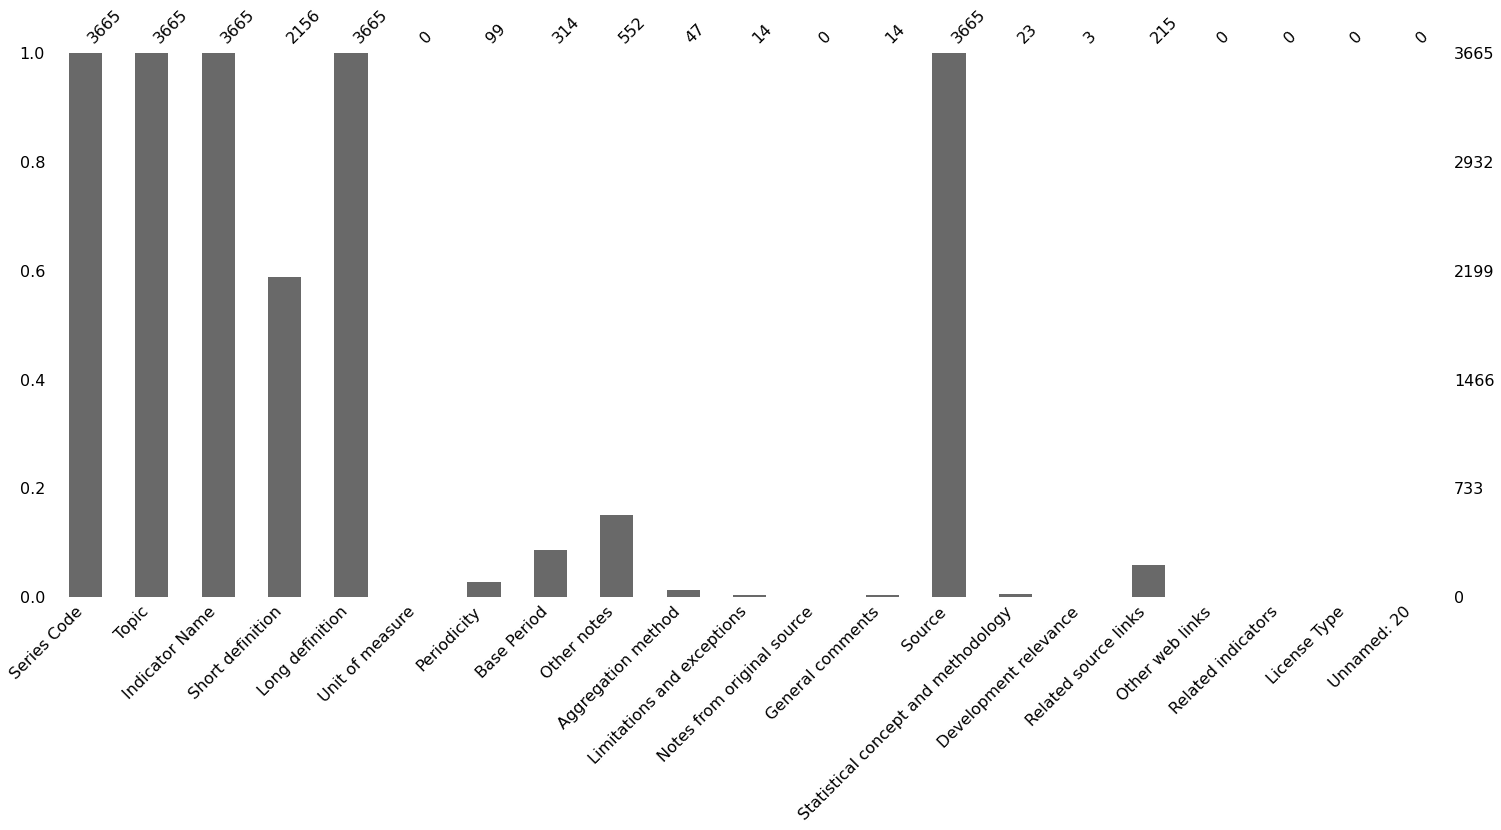

In [50]:
# Gives a bar chart of the missing values
msno.bar(df5)

# Partie2: Etude des indicateurs  <a class="anchor" id="p2"></a> 
## 1.Enlever les petits pays <a class="anchor" id="sc"></a> 

In [33]:
#From the dataset EdstatsData i take  information between 1990 and 2025
#remove rows with (all) nan 
years=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
 '2011','2012','2013','2014','2015','2016','2017','2020','2025']
data_years=df3[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
 '2011','2012','2013','2014','2015','2016','2017','2020','2025']]

data_years_filtered = data_years.dropna(subset=years,how='all')



In [41]:
data_years.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2020,2025,mean_null
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,...,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
data_years_filtered.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2020', '2025'],
      dtype='object')

In [53]:

data_years_filtered['Indicator Name'].unique().shape

(3665,)

## 2.Choix des indicateurs <a class="anchor" id="ci"></a>

In [35]:
    
indic=['Internet users (per 100 people)',       
       'Personal computers (per 100 people)',       
       'population:Population, ages 15-24, total/Population, total',
       ' Gross attendance ratio for tertiary education, both sexes (%)',
       'Gross enrolment ratio, secondary, both sexes (%)',
       'Percentage of enrolment in tertiary education in private institutions (%)',
       'Gross enrolment ratio for tertiary education, female (%)',
       'Gross enrolment ratio for tertiary education, male (%)',
       'Gross enrolment ratio for tertiary education, adjusted gender parity index (GPIA)',
       'Gross enrolment ratio, primary to tertiary, both sexes (%)',
       'Gross attendance ratio for tertiary education, urban, both sexes (%)',
       'Gross attendance ratio for tertiary education, rural, both sexes (%)',
       'Gross attendance ratio for tertiary education, both sexes (%)',
       'Gross attendance ratio for tertiary education, male (%)',
       'Gross attendance ratio for tertiary education, female (%)'
       ]  
      
       
data_years_filtered_indicators=data_years_filtered.loc[data_years_filtered['Indicator Name'].isin(indic)]
indicators=data_years_filtered_indicators['Indicator Name'].unique()
print('Retained indicators: ',indicators ,'\n')
print(indicators.shape)

Retained indicators:  ['Gross enrolment ratio, primary to tertiary, both sexes (%)'
 'Gross enrolment ratio, secondary, both sexes (%)'
 'Internet users (per 100 people)' 'Personal computers (per 100 people)'
 'Percentage of enrolment in tertiary education in private institutions (%)'] 

(5,)


## 3.Boites à moustaches <a class="anchor" id="bp"></a>

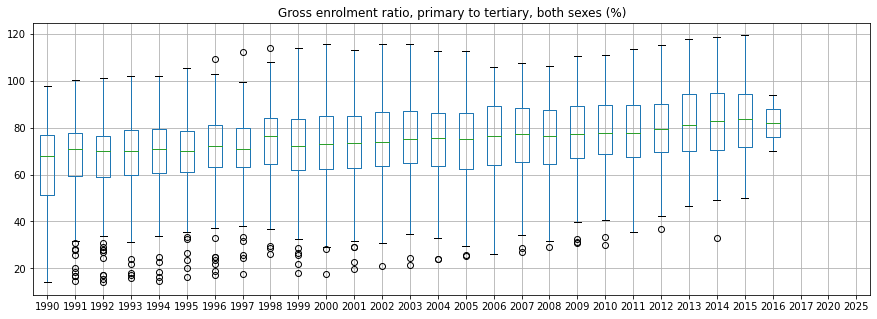

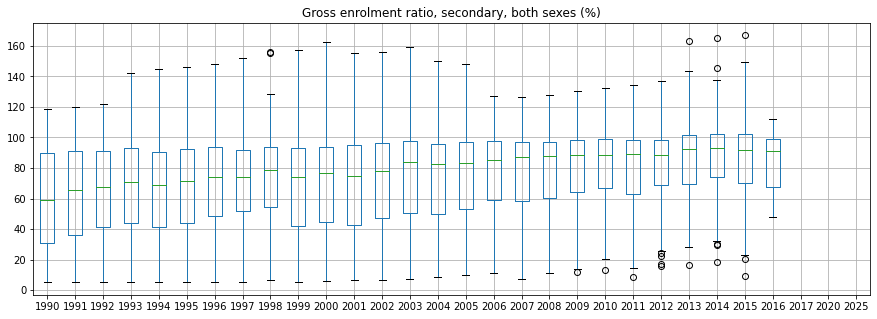

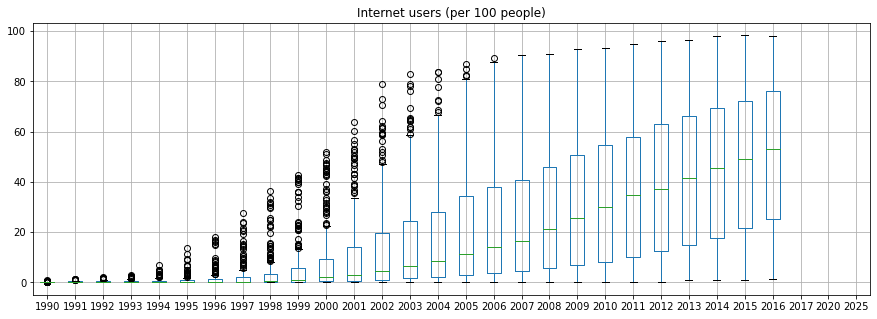

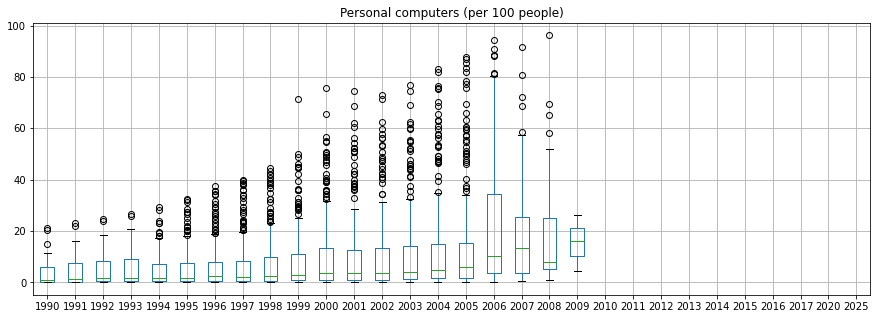

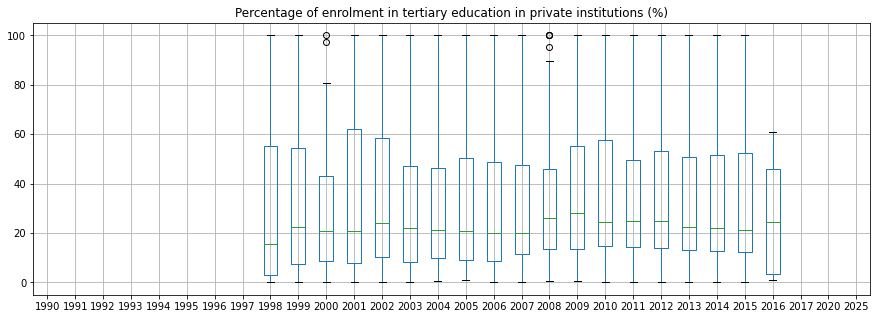

In [36]:
for ind in indicators:
    myFig = plt.figure(figsize=(15,5))
    grouped = data_years_filtered_indicators[data_years_filtered_indicators['Indicator Name']==ind]
    ax=grouped.boxplot(column=years,figsize=(15,5))
    ax.set_title(ind)
    figname='Boxplot/boxplot'+ind+'.png'
    myFig.savefig(figname, format="png")


## 4.Ordre de grandeur des indicateurs <a class="anchor" id="og"></a>

In [37]:
#Add a column with last NaN

def f(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]

data_years_filtered_indicators['Last Nan value'] = data_years_filtered_indicators.apply(f, axis=1)

C:\Users\IMEN\AppData\Local\Temp\ipykernel_3952\3586725261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_years_filtered_indicators['Last Nan value'] = data_years_filtered_indicators.apply(f, axis=1)


In [38]:

data_years_filtered_indicators.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2020,2025,Last Nan value
1327,Arab World,ARB,"Gross enrolment ratio, primary to tertiary, bo...",SE.TOT.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,66.909538,68.406288,68.120689,68.747841,NaN,NaN,NaN,NaN,NaN,68.747841
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,53.099899,53.102219,51.85363,52.434761,54.42392,54.359379,...,70.691490,71.716560,70.274689,70.735046,NaN,NaN,NaN,NaN,NaN,70.735046


In [39]:
#if a value is >100 it will be replaced by 100
for y in years:
    data_years_filtered_indicators.loc[data_years_filtered_indicators[y] >100, y] = 100 

In [40]:
data_years_filtered_indicators.head(2)


,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2020,2025,Last Nan value
1327,Arab World,ARB,"Gross enrolment ratio, primary to tertiary, bo...",SE.TOT.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,66.909538,68.406288,68.120689,68.747841,NaN,NaN,NaN,NaN,NaN,68.747841
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,53.099899,53.102219,51.85363,52.434761,54.42392,54.359379,...,70.691490,71.716560,70.274689,70.735046,NaN,NaN,NaN,NaN,NaN,70.735046


In [100]:
# Ajouter une colonne contenant la moyenne des années
data_years_filtered_indicators['mean']=data_years_filtered_indicators[years].mean(axis=1)

C:\Users\IMEN\AppData\Local\Temp\ipykernel_5548\3642408313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_years_filtered_indicators['mean']=data_years_filtered_indicators[years].mean(axis=1)


In [101]:
data_years_filtered_indicators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2020,2025,Last Nan value,mean
1327,Arab World,ARB,"Gross enrolment ratio, primary to tertiary, bo...",SE.TOT.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,68.406288,68.120689,68.747841,NaN,NaN,NaN,NaN,NaN,68.747841,64.743021
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,53.099899,53.102219,51.85363,52.434761,54.42392,54.359379,...,71.716560,70.274689,70.735046,NaN,NaN,NaN,NaN,NaN,70.735046,61.509342
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,0.000000,NaN,NaN,NaN,NaN,0.017025,...,34.014224,36.868602,NaN,NaN,NaN,NaN,NaN,NaN,36.868602,11.012568
2084,Arab World,ARB,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,0.63790,0.818198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.676681,2.526916
4992,East Asia & Pacific,EAS,"Gross enrolment ratio, primary to tertiary, bo...",SE.TOT.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,74.459442,76.420303,77.808609,NaN,NaN,NaN,NaN,NaN,77.808609,68.991696


## 5.Ordre de grandeur des indicateurs par pays<a class="anchor" id="ogc"></a>

In [72]:
def og_indicator_country(country):
    country_og_indic=data_years_filtered_indicators[data_years_filtered_indicators['Country Name']==country]
    return country_og_indic

In [73]:
#for example Arab World 
og_indicator_country('Arab World')[['Country Name','Indicator Name','Last Nan value']].head()


,Country Name,Indicator Name,Last Nan value
1327,Arab World,"Gross enrolment ratio, primary to tertiary, bo...",68.747841
1335,Arab World,"Gross enrolment ratio, secondary, both sexes (%)",70.735046
1375,Arab World,Internet users (per 100 people),36.868602
2084,Arab World,Personal computers (per 100 people),6.676681


## 6.Graphiques: Cartes<a class="anchor" id="ogc"></a>

In [84]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [108]:
def map_per_indicator(INDICATOR,column_name):
    data=world.merge(data_years_filtered_indicators, left_on = 'iso_a3', right_on = 'Country Code')#check the occurrence
    #data = data_years_filtered_indicators[data_years_filtered_indicators['Indicator Name'] == INDICATOR]
    map_data=data[data['Indicator Name']==INDICATOR]
    ax = map_data.plot(column=column_name, cmap ='YlGnBu', figsize=(15,9),scheme='quantiles', legend =True)
    map_title=column_name+' of '+INDICATOR+' by country'
    ax.set_title(map_title, fontdict={'fontsize': '15', 'fontweight' : '3'})#remove axes
    ax.set_axis_off()#move legend to an empty space
    ax.get_legend().set_bbox_to_anchor((.12,.12))
    fig=ax.get_figure()
    #save figure
    map_name='GeoMaps_'+column_name+'\Map of '+column_name +'of ' +INDICATOR+'.png'
    fig.savefig(map_name, dpi=100)

    

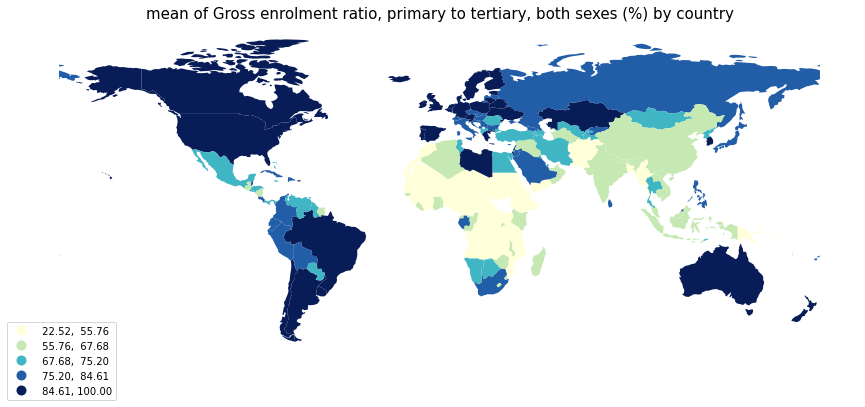

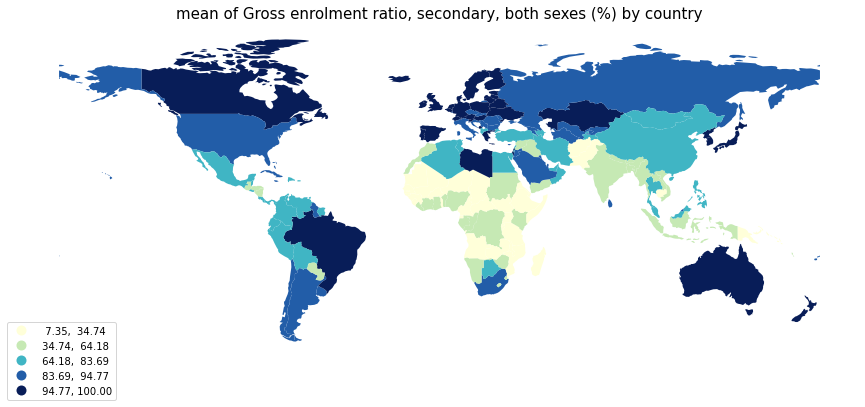

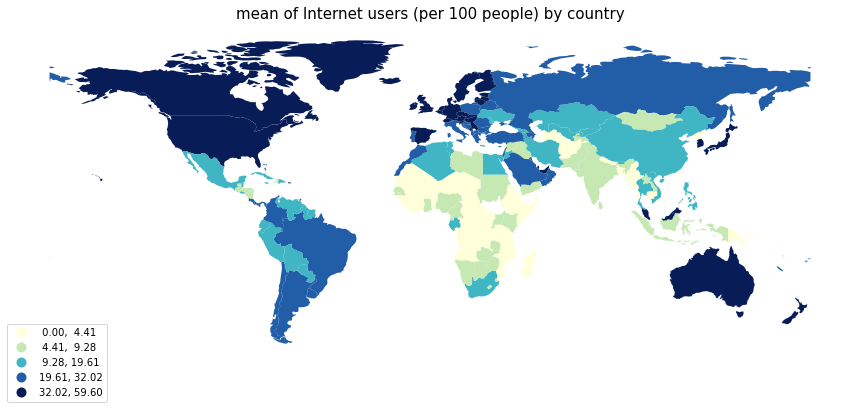

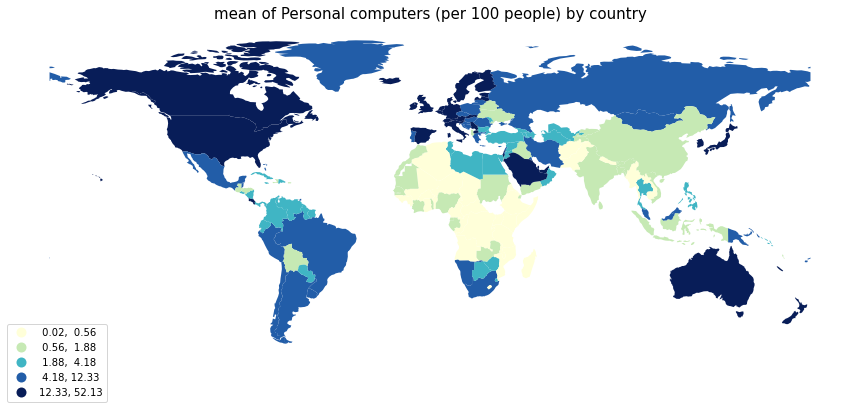

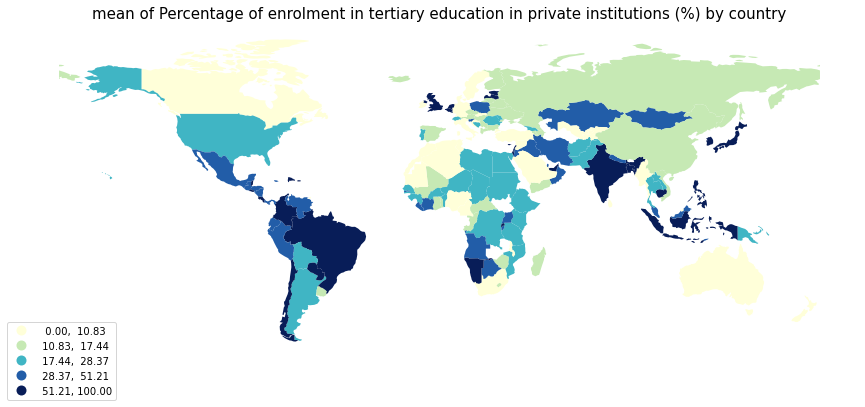

In [109]:
for indicator in indicators:
    map_per_indicator(indicator,'mean')